# Statistik
Dies ist eine kleine Zusammenfassung zusammen mit ein paar nice Python Implementierungen um nicht rechnen zu müssen. Hier werden alle nötigen Module / Bibliotheken importiert. Sicherstellen, dass alle mit `pip install` installiert wurden.

In [1]:
import statistics # no pip install
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
from scipy.stats import binom # pip install scipy
from sklearn.linear_model import LinearRegression # pip install skikit-learn

## Deskriptive Statistik

Beschreibende Statistik

### Grundbegriffe

|Begriff|Beschreibung|Synonym|Beispiel|
|-------|------------|-------|--------|
|Statistische Einheit gamma|Kleinstes Element in der Statistik, Träger von Eigenschaften, die für eine spätere statistische Untersuchung von Interesse sind.|Merkmalsträger, statistisches Element|Ein(e) Student(in) der Statistikvorlesung|
|Statist. Gesamtheit vom Umfang n|Endliche Menge abgegrenzter statistischer Einheiten|Population, Grundgesamtheit, Kollektiv|Menge der Studierenden in diesem Statistikkurs|
|Statistisches Merkmal X|Eigenschaft einer statistischen Einheit, Notation: Lateinische Großbuchstaben|Variable, Beobachtungsmerkmal|Alter eines Studierenden in diesem Statistikkurs|
|Merkmalsausprägung xi|Aussage über ein Merkmal, Notation: Lateinische Kleinbuchstaben|Realisation, Beobachtung|xi=20

### Skalen

*Kategorialskalen:*
- Nominalskala: Gleich oder Ungleich, keine Reihenfolge festlegbar (ledig, verheiratet, geschieden...)
- Ordinalskala: Kategorie mit Reihenfolge (small, medium, large)

*Metrischeskalen:*
- Kardinalskala: Reele Zahlen, Intervall- oder Verhältnissklaiert

### Merkmale

*Diskretes Merkmal:*
kann nur nur endlich oder unendlich viele 
Ausprägungen annehmen kann

*Stetiges Merkmal:*
kann unendlich viele Ausprägungen annehmen. 
Für je zwei Ausprägungen eines stetigen Merkmals 
gilt, dass auch alle Zwischenwerte angenommen 
werden können.

Absolute Häufigkeit h(x): Anzahl Beobachtungen  
Relative Häufigkeit f(x): Anteil aller Beobachtungen (Prozent)  
Kommulierte Absolute Häufigkeit H(x): Aufsummierte Anzahl der Beobachtungen  
Kommulierte Relative Häufigkeit F(x): Aufsummierter Anteil aller Beobachtungen

### Verteilungen

__Hier kann das `statistics` Modul benutzt werden!__ Es gibt auch noch weitere hilfreiche Funktionen als die unten, wie zum Beispiel `.median_low()`: [https://docs.python.org/3/library/statistics.html](https://docs.python.org/3/library/statistics.html)

*Lageparameter:*
- Modus `.mode()`
- Median `.median()`
- Mittelwert `.fmean()`

*Streuungsparameter:*
- Varianz `.pvariance()`
- Standardabweichung `.pstdev()`
- Variationskoeffizient (relative Standardabweichung) `.pstdev()/.mean()`

In [2]:
data = [1000, 1100, 1100, 1100, 2500, 2600, 2700, 2750, 2790, 2820, 4000, 30000]
# data = np.concatenate((np.full(shape=20, fill_value=1), np.full(shape=30, fill_value=2), np.full(shape=30, fill_value=3), np.full(shape=20, fill_value=4)))
mean = statistics.fmean(data)
print(f"Mode: {statistics.mode(data)}")
print(f"Median: {statistics.median(data):.2f}")
print(f"Mean: {statistics.fmean(data):.2f}")
print(f"Variance: {statistics.pvariance(data, mean):.4f}")
print(f"Standard Deviation: {statistics.pstdev(data, mean):.4f}")
print(f"Variationskoeffizient: {statistics.pstdev(data, mean)/statistics.mean(data):.4f}")

Mode: 1100
Median: 2650.00
Mean: 4538.33
Variance: 59755947.2222
Standard Deviation: 7730.1971
Variationskoeffizient: 1.7033


### Zweidimensionale Daten

Hier ist es am besten, wenn man eine Kontigenztabelle benutzt.

### Korrelationsanalyse

Hierbei kann das Pandas Modul genutzt werden.

- Empirische Kovarianz `.cov()`
- Empirischer Korrelationskoeffizient `.corr()`

In [3]:
df = pd.DataFrame([(1, 1), (1, 1), (4, 2), (4, 3), (2, 2), (5, 2), (3, 2), (3, 6), (4, 1), (4, 4)], columns=['Mathenote X', 'Englischnote Y'])
#df = pd.DataFrame([(50000, 170), (40000, 160), (80000, 160), (60000, 180), (50000, 190), (80000, 190)], columns=['Mathenote X', 'Englischnote Y'])
#df = pd.DataFrame([(4.1, 10.1), (2.4, 4), (8.4, 5.7), (8.2, 10.2), (11.9, 7.5), (4.6, 2.1), (9.4, 8), (3.6, 1.3), (10.6, 2.2), (7.9, 6.3)], columns=['Mathenote X', 'Englischnote Y'])
df.cov(ddof=0)

,Mathenote X,Englischnote Y
Mathenote X,1.69,0.56
Englischnote Y,0.56,2.24


In [4]:
df.corr()

,Mathenote X,Englischnote Y
Mathenote X,1.00000,0.28782
Englischnote Y,0.28782,1.00000


### Regressionsanalye

Hierzu kann die Bibliothek scikit-learn benutzt werden. Da diese Bibliothek auch für n-Dimensionale Problemstellungen geeignet ist, muss hier besonders auf die Datentypen und die Matrix / Array Größen und Formen geachet werden.

__Lineare Regression:__

- Nutzung von `LinearRegression().fit(X, Y)`
- Steigung a `regressor.coeff_`
- Parameter b `regressor.intercept_`
- Bestimmtheitsmaß R^2 `regressor.score(X, Y)`

In [5]:
data = pd.DataFrame([(3, 3), (6, 6), (2, 3), (1, 2), (3, 4), (8, 10), (0, 4), (1, 0)], columns=['Aktie A', 'Marktindex'])
#data = pd.DataFrame([()], columns=['Aktie A', 'Marktindex'])
X = data.iloc[:, 0].values.reshape(-1, 1)
Y = data.iloc[:, 1].values.reshape(-1, 1)

regressor = LinearRegression().fit(X, Y)
Y_pred = regressor.predict(X)

print(f"Die Lineare Regressionsfunktion lautet: y(x) = {regressor.coef_[0][0]:.2f}x + {regressor.intercept_[0]:.2f}")
print(f"Das Bestimmtheitsmaß beträgt: {regressor.score(X, Y):.4f}")

Die Lineare Regressionsfunktion lautet: y(x) = 0.94x + 1.17
Das Bestimmtheitsmaß beträgt: 0.7447


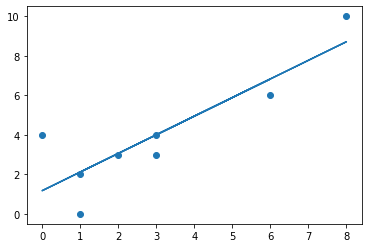

In [6]:
plt.scatter(data['Aktie A'], data['Marktindex'])
plt.plot(data['Aktie A'], Y_pred)
plt.show()

## Wahrscheinlichkeitsrechnung

Hierzu kann die Bibliothek SciPy, insbesondere das statistik Modul benutzt werden. [https://docs.scipy.org/doc/scipy/reference/index.html](https://docs.scipy.org/doc/scipy/reference/index.html)

### Binomialverteilung



In [7]:
n, p = 5, 0.4
mean, variance, skew, kurt = binom.stats(n, p, moments='mvsk') # mean, variance, skew, kurt
print(f"Mean: {mean:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Skew: {skew:.2f}")
print(f"Kurt: {kurt:.2f}")
print(f"Propability of k=1: {binom.pmf(1, n, p):.2f}")
print(f"Commulative propability of k<=1: {binom.cdf(1, n, p):.2f}")
print(f"Standard deviation: {binom.std(n, p):.2f}")
print(f"Variation coefficient at k=1: {binom.std(n, p)/binom.pmf(1, n, p):.2f}")

Mean: 2.00
Variance: 1.20
Skew: 0.18
Kurt: -0.37
Propability of k=1: 0.26
Commulative propability of k<=1: 0.34
Standard deviation: 1.10
Variation coefficient at k=1: 4.23


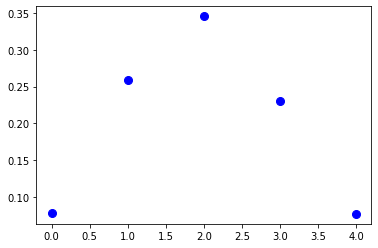

In [8]:
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.show()

## Induktive Statistik
